In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

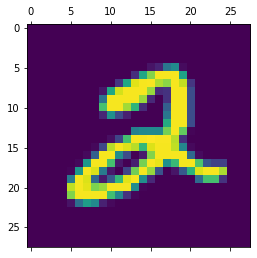

In [ ]:
plt.matshow(X_train[5])

In [ ]:
#Scaling training data and test data
X_train = X_train/255
X_test = X_test/255

In [ ]:
print(X_train[5])

In [ ]:
#Flatten training and test dataset
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [ ]:
X_train_flattened.shape

(60000, 784)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [ ]:
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4692 - accuracy: 0.8763
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3037 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2831 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2728 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2662 - accuracy: 0.9259


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2660 - accuracy: 0.9264


[0.26595765352249146, 0.9264000058174133]

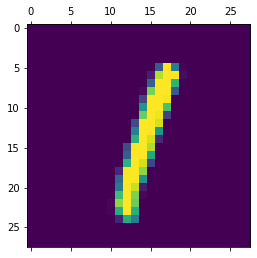

In [ ]:
plt.matshow(X_test[5])

In [ ]:
prediction = model.predict(X_test_flattened)
prediction[0]

313/313 [==============================] - 1s 1ms/step


array([1.8272877e-02, 1.8155178e-07, 4.5870051e-02, 9.5421481e-01,
       1.7557599e-03, 9.9036030e-02, 1.3245997e-06, 9.9977112e-01,
       8.1006683e-02, 5.4324532e-01], dtype=float32)

In [ ]:
np.argmax(prediction[5])

1

In [ ]:
prediction_labels = [np.argmax(i) for i in prediction]

In [ ]:
prediction_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = prediction_labels)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    2,    2,    0,    5,    4,    2,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   5,    7,  939,   15,    6,    2,   12,   10,   32,    4],
       [   2,    0,   24,  926,    0,   19,    2,   14,   18,    5],
       [   3,    1,   10,    2,  900,    0,    8,    6,   10,   42],
       [   9,    2,    5,   41,    5,  775,   11,    7,   31,    6],
       [  13,    3,    8,    1,    7,   13,  909,    2,    2,    0],
       [   1,    5,   24,    4,    4,    0,    0,  964,    3,   23],
       [   8,    8,    8,   22,    9,   30,    8,   13,  862,    6],
       [  11,    5,    1,   12,   23,    9,    0,   31,    7,  910]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

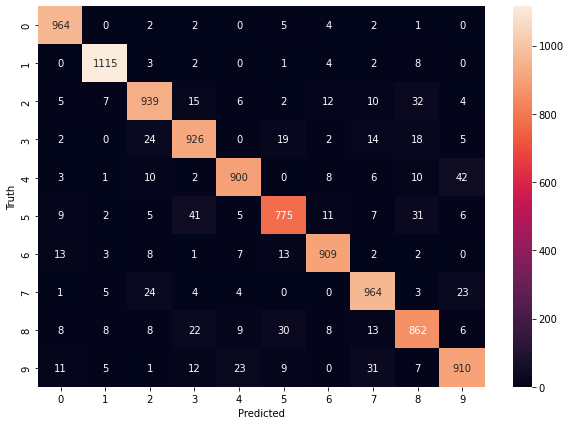

In [ ]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#added hidden layer
model = keras.Sequential([
    keras.layers.Dense(400, input_shape=(784,), activation='relu'),
    keras.layers.Dense(100, activation ='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])


In [ ]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1953 - accuracy: 0.9417
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0809 - accuracy: 0.9751
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0563 - accuracy: 0.9817
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0434 - accuracy: 0.9858
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0332 - accuracy: 0.9890


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0801 - accuracy: 0.9783


[0.08005733788013458, 0.9782999753952026]

313/313 [==============================] - 1s 3ms/step


Text(69.0, 0.5, 'Truth')

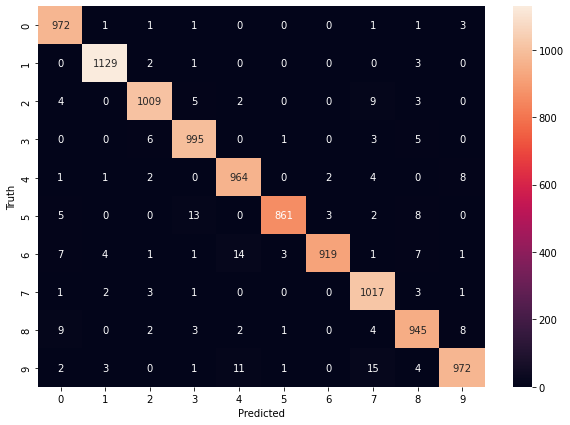

In [ ]:
prediction = model.predict(X_test_flattened)
prediction_labels = [np.argmax(i) for i in prediction]

confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=prediction_labels)

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#Creating model without flattened Array
model  = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(400, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1983 - accuracy: 0.9400
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0832 - accuracy: 0.9741
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0572 - accuracy: 0.9819
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0409 - accuracy: 0.9867
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0320 - accuracy: 0.9898


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0755 - accuracy: 0.9781


[0.07551936060190201, 0.9781000018119812]

In [ ]:
prediction = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


Text(69.0, 0.5, 'Truth')

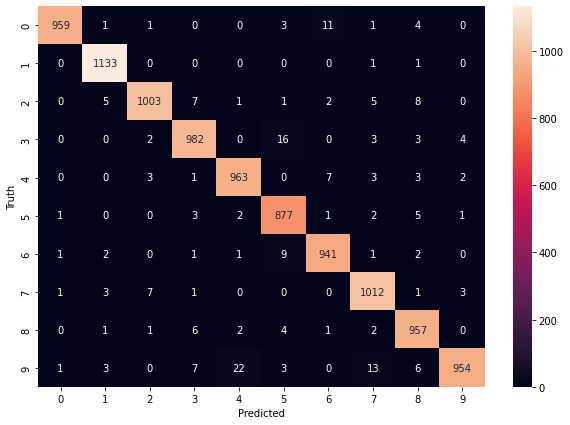

In [ ]:
prediction_labels = [np.argmax(i) for i in prediction]
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions= prediction_labels)

plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
